## 2021 Fall "EE488 : Quantum and Solid-State Physics for Semiconductor Devices"


## Tight binding model: Graphene nanoribbons (GNR)

Writer: Ryong-Gyu, Lee (KAIST EE, Yong-Hoon Kim Group)  
2021.10.25

**References**:  
https://link.springer.com/article/10.1007%2Fs12274-008-8043-2


### 1. Armchair GNR

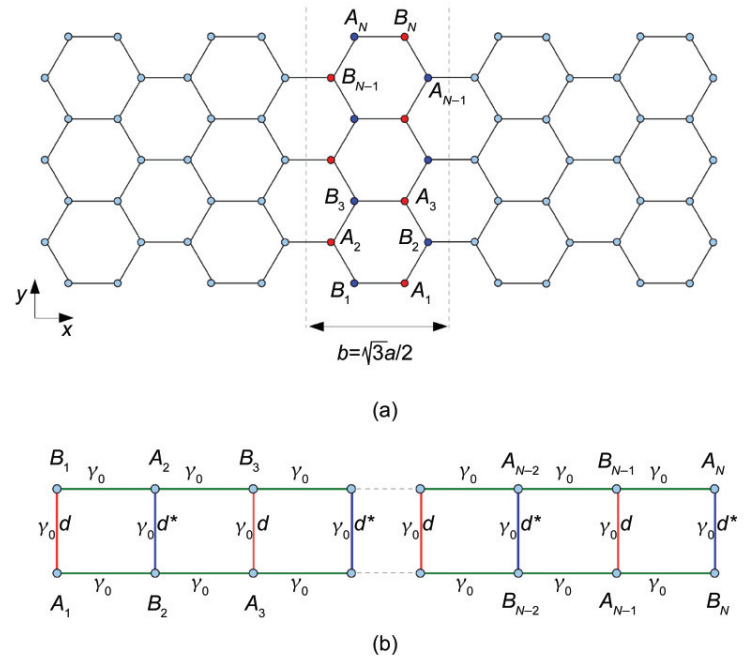

For the armchair nanoribbons case, tight-bindind model Hamiltonian is equivalent to the $2N\times2N$ Hamiltonian of two coupled chains with $N$ orbitals as described below,

$$H = \gamma_0 
\begin{bmatrix}
0 & 1 & 0 & ... & d & 0 & 0 & ... \\
1 & 0 & 1 & ... & 0 & d^{*} & 0 & ... \\
0 & 1 & 0 & ... & 0 & 0 & d & ... \\
... & ... & ... & ... & ... & ... & ... & ... \\
d^{*} & 0 & 0 & ... & 0 & 1 & 0 & ... \\
0 & d & 0 & ... & 1 & 0 & 1 & ... \\
0 & 0 & d^{*} & ... & 0 & 1 & 0 & ... \\
... & ... & ... & ... & ... & ... & ... & ...
\end{bmatrix}
$$

where, $\gamma_0$ is hopping parameter and $d$ equals to $e^{ikb/2}$.


In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

def armchair_GNR(n=3, t=1):

    # Parameters
    acc = 1.42             # carbon-carbon bond length
    a = np.sqrt(3) * acc   # graphene lattice parameter
    b = np.sqrt(3) * a
    
    # total number of carobon atoms
    natoms =  2*n
    
    # kpoints
    nkpts = 101
    k = np.linspace(-np.pi/b,np.pi/b,nkpts)
    
    # eigenvalues
    ek = np.zeros((natoms,len(k)))
    
    # calculate eigenvalues for each kpoints
    for ik in range(len(k)):
        
        # construct the tight-binding Hamiltonian
        h1 = np.eye(n,k=1) + np.eye(n,k=-1)        
        d = np.exp(1j*k[ik]*b/2)
        diag = []
        for i in range(0,n):
            if i%2==0:
                diag.append(d)
            else:
                diag.append(np.conj(d))
        h2 = np.diag(diag)
        h3 = np.conj(h2)
        h4 = np.conj(h1)
        h = t * np.vstack([np.hstack([h1, h2]),np.hstack([h3, h4])])
        
        # diagonalize the Hamiltonian
        eig, vec = np.linalg.eigh(h)
        ek[:,ik] = eig.real
        
    # Plot energy dispersion
    fig = plt.figure(figsize=(4,5))
    
    for ib in range(natoms):
        plt.plot(k,ek[ib,:],color='k')
    plt.xlim([-np.pi/b,np.pi/b])
    plt.ylim([-3,3])
    plt.title('Armchair GNR')
    plt.xticks([-np.pi/b,0, np.pi/b],[r'$-\pi/b$','0', r'$\pi/b$'])
    plt.xlabel(r'$k_{x}$')
    plt.ylabel(r'$Energy [eV]$')
    
    plt.tight_layout()
    plt.show()


if __name__=="__main__":
    
    import ipywidgets as widgets
    widgets.interact(armchair_GNR,
                     n=(3,50,1),
                     t=(-1,1,0.1)
                    )
    
        

interactive(children=(IntSlider(value=3, description='n', max=50, min=3), FloatSlider(value=1.0, description='…

### Discussion

- How many bands appear in the $n$-armchair GNR band structures?
- Discuss the difference between the armchair GNR and zigzag CNT band structures
- Check metallicity condition for the armchair GNR is $n$=3$m$+2 ($m$=1,2,3,..)

### 2. Zigzag GNR

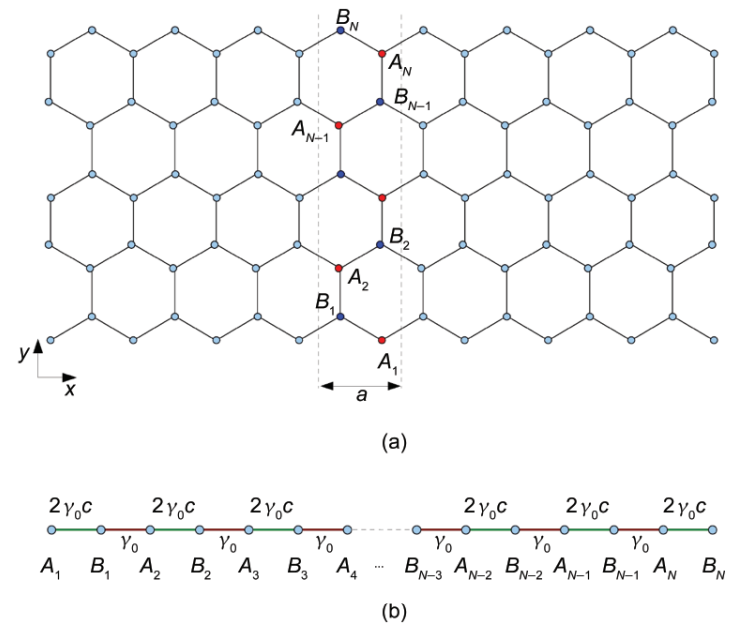

For the zigzag nanoribbons case, tight-bindind model Hamiltonian is equivalent to the $2N\times2N$ Hamiltonian of the 2N-orbital
chain as described below,

$$H = \gamma_0 
\begin{bmatrix}
0 & 2c & 0 & ... & ... & ... \\
2c & 0 & 1 & 0 & ... & ... \\
0 & 1 & 0 & 2c & 0 & ... \\
0 & 0 & 2c & 0 & 1 & ... \\
... & ... & ... & ... & ... & 2c \\
0 & ... & ... & 0 & 2c & 0
\end{bmatrix}
$$

where, $\gamma_0$ is hopping parameter and $c$ equals to $cos(ka/2)$.

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

def zigzag_GNR(n=3, t=1):

    # Parameters
    acc = 1.42             # carbon-carbon bond length
    a = np.sqrt(3) * acc   # graphene lattice parameter
    b = np.sqrt(3) * a
    
    # total number of carobon atoms
    natoms =  2*n
    
    # kpoints
    nkpts = 121
    k = np.linspace(-np.pi/a,np.pi/a,nkpts)
    
    # eigenvalues
    ek = np.zeros((natoms,len(k)))
    
    # calculate eigenvalues for each kpoints
    for ik in range(len(k)):
        
        # construct the tight-binding Hamiltonian
        c = np.cos(k[ik]*a/2)
        diag = []
        for i in range(0,natoms-1):
            if i%2==0:
                diag.append(2*c)
            else:
                diag.append(1)
        h1 = np.diag(diag,k=1)
        h2 = np.diag(diag,k=-1)
        h = t*(h1+h2)
        h[2*n-1,0] = 0
        h[0,2*n-1] = 0

        # diagonalize the Hamiltonian
        eig, vec = np.linalg.eigh(h)
        ek[:,ik] = eig.real
        
    # Plot energy dispersion

    fig = plt.figure(figsize=(4,5))
    for ib in range(natoms):
        plt.plot(k,ek[ib,:],color='k')

    plt.xlim([-np.pi/a,np.pi/a])
    plt.ylim([-3,3])
    plt.title('Zigzag GNR')
    plt.xticks([-np.pi/a,0, np.pi/a],[r'$-\pi/a$','0', r'$\pi/a$'])
    plt.xlabel(r'$k_{x}$')
    plt.ylabel(r'$Energy [eV]$')
    fig.tight_layout()
    plt.show()    

if __name__=="__main__":
    
    import ipywidgets as widgets
    widgets.interact(zigzag_GNR,
                     n=(3,60,1),
                     t=(-1,1,0.2)
                    )

interactive(children=(IntSlider(value=3, description='n', max=60, min=3), FloatSlider(value=1.0, description='…

### Discussion

- How many bands appear in the $n$-zigzag GNR band structures?
- Discuss the difference between the armchair GNR and zigzag CNT band structures
- By increaing width ($n$) of zigzag GNRs, check the zero-energy flat band region appears near $k_x=(\frac{-\pi}{a},-\frac{2\pi}{3a})$, $(\frac{2\pi}{3a},\frac{\pi}{a})$

### Appendix: wavefunction of zigzag GNRs

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

def zigzag_GNR(n=3, kx=0):

    # Parameters
    t = 1
    acc = 1.42             # carbon-carbon bond length
    a = np.sqrt(3) * acc   # graphene lattice parameter
    b = np.sqrt(3) * a
    
    # total number of carobon atoms
    natoms =  2*n
    
    # kpoints
    nkpts = 121
    k = np.linspace(-np.pi/a,np.pi/a,nkpts)
    
    # eigenvalues
    ek = np.zeros((natoms,len(k)))
    wk_homo = np.zeros((natoms,len(k)))
    wk_lumo = np.zeros((natoms,len(k)))
    
    # calculate eigenvalues for each kpoints
    for ik in range(len(k)):
        
        # construct the tight-binding Hamiltonian
        c = np.cos(k[ik]*a/2)
        diag = []
        for i in range(0,natoms-1):
            if i%2==0:
                diag.append(2*c)
            else:
                diag.append(1)
        h1 = np.diag(diag,k=1)
        h2 = np.diag(diag,k=-1)
        h = t*(h1+h2)
        h[2*n-1,0] = 0
        h[0,2*n-1] = 0

        # diagonalize the Hamiltonian
        eig, vec = np.linalg.eigh(h)
        ek[:,ik] = eig.real
        wk_homo[:,ik] = np.absolute(vec[:,n-1])
        wk_lumo[:,ik] = np.absolute(vec[:,n])
        
    # Plot wavefunction

    fig = plt.figure(figsize=(5,4))
    kx = int(kx*len(k)/100)
    plt.plot(wk_homo[:,kx],color='r')
    plt.plot(wk_lumo[:,kx],color='b')
    plt.ylim([0,1])
    plt.xlabel('Atomic index')
    plt.ylabel(r'$|\psi|$')
    fig.tight_layout()
    plt.show()
    

if __name__=="__main__":
    
    import ipywidgets as widgets
    widgets.interact(zigzag_GNR,
                     n=(3,60,1),
                     kx=(0,100,1)
                    )

interactive(children=(IntSlider(value=3, description='n', max=60, min=3), IntSlider(value=0, description='kx')…

### Discussion

- Which atomic states contribute to the zero-energy flat band? and why thier band gaps open at the low-frequency region?